In [1]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
with open('Catalogue.csv', 'r', encoding='latin-1') as file:
    catalogue = pd.read_csv(file)  # read catalogue file
catalogue.head()

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix
0,Volvo,S80 T6,272,très longue,5,5,blanc,False,50500
1,Volvo,S80 T6,272,très longue,5,5,noir,False,50500
2,Volvo,S80 T6,272,très longue,5,5,rouge,False,50500
3,Volvo,S80 T6,272,très longue,5,5,gris,True,35350
4,Volvo,S80 T6,272,très longue,5,5,bleu,True,35350


In [3]:
# missing values verification
missing_values = catalogue.isnull().sum()
missing_values

marque       0
nom          0
puissance    0
longueur     0
nbPlaces     0
nbPortes     0
couleur      0
occasion     0
prix         0
dtype: int64

In [4]:
## add a function that content the normalisation formule and choose the bset normalisation formule
## the attrebutes add clusters


# Select relevant features for clustering
features = catalogue[['puissance', 'nbPlaces', 'nbPortes', 'prix']]
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [5]:
from sklearn.preprocessing import LabelEncoder
longueur = catalogue['longueur']
occasion = catalogue['occasion']
label_encoder = LabelEncoder()
encoded_longueur = label_encoder.fit_transform(longueur)
encoded_occasion = label_encoder.fit_transform(occasion)
data={
    'puissance':catalogue['puissance'],
    'nbPlaces':catalogue['nbPlaces'],
    'nbPortes':catalogue['nbPortes'],
    'longueur':encoded_longueur,
    'occasion':encoded_occasion,
}
proccessed_data = pd.DataFrame(data)
proccessed_data

,puissance,nbPlaces,nbPortes,longueur,occasion
0,272,5,5,3,0
1,272,5,5,3,0
2,272,5,5,3,0
3,272,5,5,3,1
4,272,5,5,3,1
...,...,...,...,...,...
265,75,5,5,0,0
266,75,5,5,0,0
267,75,5,5,0,1
268,75,5,5,0,1


In [6]:
import os
os.environ["OMP_NUM_THREADS"] = "2"

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(proccessed_data)
    wcss.append(kmeans.inertia_)

C:\Users\NITRO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\NITRO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\NITRO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\NITRO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Window

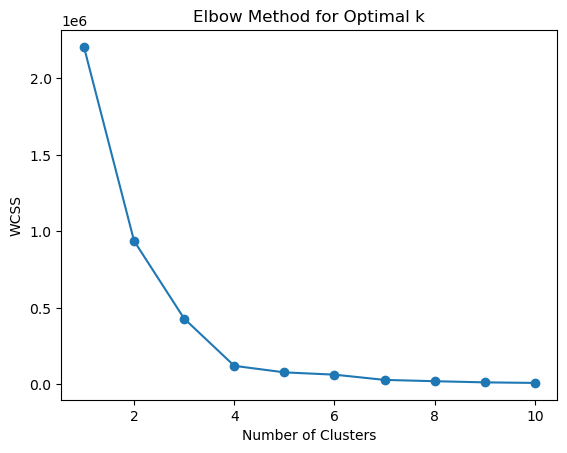

In [7]:
# Plot the Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\NITRO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\NITRO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


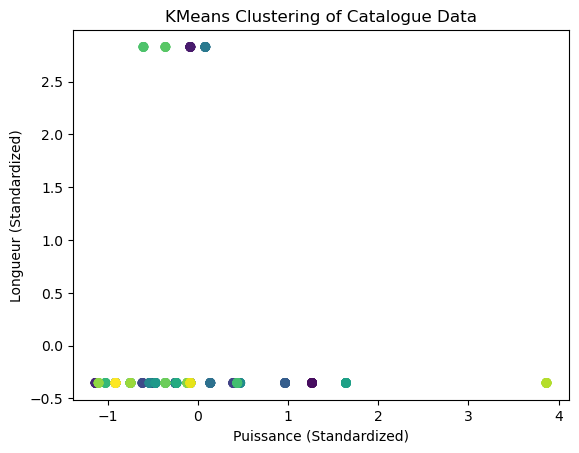

In [8]:
optimal_k = 4  # Adjust this based on the plot
cluster_names = {
    0: 'Family Cars',
    1: 'Sport Utility Cars',
    2: 'City Cars',
    3: 'Luxury Cars'
}

# Assuming 'features_scaled' is your standardized feature data
# Assuming 'kmeans' is your trained KMeans model

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
catalogue['Cluster'] = kmeans.fit_predict(features_scaled)

# Map cluster names to the DataFrame
catalogue['Cluster'] = catalogue['Cluster'].map(cluster_names)

# Visualize the clusters (for 2D features)
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=catalogue['Cluster'].index, cmap='viridis')
plt.title('KMeans Clustering of Catalogue Data')
plt.xlabel('Puissance (Standardized)')
plt.ylabel('Longueur (Standardized)')
plt.show()

In [9]:
# Select relevant columns for correlation analysis
selected_columns = ['puissance', 'longueur', 'nbPlaces', 'nbPortes', 'occasion']
correlation_data = proccessed_data[selected_columns]

# Generate the correlation matrix
correlation_matrix = correlation_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
           puissance  longueur  nbPlaces  nbPortes  occasion
puissance   1.000000  0.710309 -0.057082  0.310988  0.086718
longueur    0.710309  1.000000 -0.140153  0.437447  0.001358
nbPlaces   -0.057082 -0.140153  1.000000  0.112938 -0.053300
nbPortes    0.310988  0.437447  0.112938  1.000000  0.004816
occasion    0.086718  0.001358 -0.053300  0.004816  1.000000


In [10]:
from sklearn.metrics import silhouette_score
# Calculate Silhouette Score
silhouette_avg = silhouette_score(features_scaled, catalogue['Cluster'])
print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')

Silhouette Score for 4 clusters: 0.7451650933963778


In [11]:
catalogue[220:]

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,Cluster
220,Daihatsu,Cuore 1.0,58,courte,5,3,noir,False,8850,City Cars
221,Daihatsu,Cuore 1.0,58,courte,5,3,blanc,False,8850,City Cars
222,Daihatsu,Cuore 1.0,58,courte,5,3,rouge,False,8850,City Cars
223,Daihatsu,Cuore 1.0,58,courte,5,3,bleu,False,8850,City Cars
224,Daihatsu,Cuore 1.0,58,courte,5,3,gris,False,8850,City Cars
225,Dacia,Logan 1.6 MPI,90,moyenne,5,5,blanc,False,7500,Sport Utility Cars
226,Dacia,Logan 1.6 MPI,90,moyenne,5,5,rouge,False,7500,Sport Utility Cars
227,Dacia,Logan 1.6 MPI,90,moyenne,5,5,noir,False,7500,Sport Utility Cars
228,Dacia,Logan 1.6 MPI,90,moyenne,5,5,gris,False,7500,Sport Utility Cars
229,Dacia,Logan 1.6 MPI,90,moyenne,5,5,bleu,False,7500,Sport Utility Cars


In [80]:
catalogue.to_csv('new_catalogue.csv', index=False)

In [12]:
with open('Clients.csv', 'r', encoding='latin-1') as file:
    clients = pd.read_csv(file)  # read Client file
clients.head()

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation
0,25,F,159,En Couple,2,false,3467 SB 72
1,53,M,594,En Couple,2,false,113 LY 42
2,20,F,949,En Couple,1,false,925 WK 87
3,29,M,571,En Couple,2,false,3279 RV 81
4,47,M,502,En Couple,1,false,82 RZ 54


In [13]:
# missing values verification
missing_values = clients.isnull().sum()
missing_values

age                   0
sexe                  0
taux                  0
situationFamiliale    0
nbEnfantsAcharge      0
2eme voiture          0
immatriculation       0
dtype: int64

In [14]:
with open('Immatriculations.csv', 'r', encoding='latin-1') as file:
    immatriculations = pd.read_csv(file)  # Read Client File
immatriculations.head()

,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix
0,3176 TS 67,Renault,Laguna 2.0T,170,longue,5,5,blanc,False,27300
1,3721 QS 49,Volvo,S80 T6,272,très longue,5,5,noir,False,50500
2,9099 UV 26,Volkswagen,Golf 2.0 FSI,150,moyenne,5,5,gris,True,16029
3,3563 LA 55,Peugeot,1007 1.4,75,courte,5,5,blanc,True,9625
4,6963 AX 34,Audi,A2 1.4,75,courte,5,5,gris,False,18310


In [15]:
# missing values verification
missing_values = immatriculations.isnull().sum()
missing_values

immatriculation    0
marque             0
nom                0
puissance          0
longueur           0
nbPlaces           0
nbPortes           0
couleur            0
occasion           0
prix               0
dtype: int64

In [16]:
#merge the data set
data = pd.merge(clients, immatriculations, on='immatriculation', how='inner')
data = pd.merge(data, catalogue, on=['marque', 'nom', 'puissance', 'occasion', 'prix', 'nbPortes', 'nbPlaces', 'longueur', 'couleur'], how='inner')
data

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,Cluster
0,25,F,159,En Couple,2,false,3467 SB 72,Seat,Toledo 1.6,102,longue,5,5,bleu,False,18880,Sport Utility Cars
1,21,M,180,En Couple,0,false,9789 XL 80,Seat,Toledo 1.6,102,longue,5,5,bleu,False,18880,Sport Utility Cars
2,56,M,204,En Couple,2,false,1654 NV 63,Seat,Toledo 1.6,102,longue,5,5,bleu,False,18880,Sport Utility Cars
3,73,M,204,En Couple,1,false,9337 EU 36,Seat,Toledo 1.6,102,longue,5,5,bleu,False,18880,Sport Utility Cars
4,29,M,236,En Couple,2,false,3943 VE 37,Seat,Toledo 1.6,102,longue,5,5,bleu,False,18880,Sport Utility Cars
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100340,26,F,232,Célibataire,0,false,6267 HX 33,Volkswagen,New Beatle 1.8,110,moyenne,5,5,gris,True,18641,Sport Utility Cars
100341,67,F,185,Célibataire,0,false,6103 YB 59,Volkswagen,New Beatle 1.8,110,moyenne,5,5,gris,True,18641,Sport Utility Cars
100342,26,F,249,Célibataire,0,false,1866 SH 29,Volkswagen,New Beatle 1.8,110,moyenne,5,5,gris,True,18641,Sport Utility Cars
100343,56,F,203,Célibataire,0,false,401 MT 34,Volkswagen,New Beatle 1.8,110,moyenne,5,5,gris,True,18641,Sport Utility Cars


## Data Preproccessing

In [17]:
### the number of rows
row_count = data.shape[0]
print("Number of rows:", row_count)

Number of rows: 100345


In [18]:
data = data.drop(['immatriculation','marque','nom','puissance','longueur','nbPlaces','nbPortes','couleur','occasion','prix'], axis=1)

In [19]:
data = data.drop_duplicates()
row_count = data.shape[0]
print("Number of rows:", row_count)

Number of rows: 92391


In [20]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in age: ['25' '21' '56' '73' '29' '44' '60' '66' '46' '84' '26' '37' '33' '24'
 '30' '18' '35' '31' '43' '52' ' ' '80' '74' '47' '65' '20' '27' '54' '61'
 '23' '83' '40' '59' '67' '55' '36' '19' '48' '53' '62' '28' '38' '70'
 '63' '22' '64' '76' '50' '32' '79' '42' '49' '81' '41' '57' '69' '58'
 '77' '82' '39' '34' '45' '72' '68' '51' '?' '-1' '75' '71' '78']
Unique values in sexe: ['F' 'M' 'Homme' 'Masculin' 'Femme' ' ' 'Féminin' 'N/D' '?']
Unique values in taux: ['159' '180' '204' ... '1021' '1141' '1232']
Unique values in situationFamiliale: ['En Couple' 'Seule' 'Marié(e)' '?' 'N/D' 'Célibataire' ' ' 'Divorcée'
 'Seul']
Unique values in nbEnfantsAcharge: ['2' '0' '1' '3' '?' '4' '-1' ' ']
Unique values in 2eme voiture: ['false' ' ' 'true' '?']
Unique values in Cluster: ['Sport Utility Cars' 'Luxury Cars' 'City Cars']


In [21]:
data.loc[:, 'age'] = data['age'].replace(['?','-1', ' '], np.nan)
data.loc[:, 'nbEnfantsAcharge'] = data['nbEnfantsAcharge'].replace(['?','-1', ' '], np.nan)
data.loc[:, 'sexe'] = data['sexe'].replace(['?','N/D', ' '], np.nan)
data.loc[:, 'situationFamiliale'] = data['situationFamiliale'].replace(['?','N/D', ' ','nan'], np.nan)
data.loc[:, 'taux'] = data['taux'].replace(['?','N/D', ' ','nan'], np.nan)
data.loc[:, '2eme voiture'] = data['2eme voiture'].replace(['?', ' '], np.nan)

In [22]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in age: ['25' '21' '56' '73' '29' '44' '60' '66' '46' '84' '26' '37' '33' '24'
 '30' '18' '35' '31' '43' '52' nan '80' '74' '47' '65' '20' '27' '54' '61'
 '23' '83' '40' '59' '67' '55' '36' '19' '48' '53' '62' '28' '38' '70'
 '63' '22' '64' '76' '50' '32' '79' '42' '49' '81' '41' '57' '69' '58'
 '77' '82' '39' '34' '45' '72' '68' '51' '75' '71' '78']
Unique values in sexe: ['F' 'M' 'Homme' 'Masculin' 'Femme' nan 'Féminin']
Unique values in taux: ['159' '180' '204' ... '1021' '1141' '1232']
Unique values in situationFamiliale: ['En Couple' 'Seule' 'Marié(e)' nan 'Célibataire' 'Divorcée' 'Seul']
Unique values in nbEnfantsAcharge: ['2' '0' '1' '3' nan '4']
Unique values in 2eme voiture: ['false' nan 'true']
Unique values in Cluster: ['Sport Utility Cars' 'Luxury Cars' 'City Cars']


In [23]:
# 1. Check for missing values
print("Missing values before imputation:")
print(data.isnull().sum())

Missing values before imputation:
age                   301
sexe                  292
taux                  189
situationFamiliale    320
nbEnfantsAcharge      307
2eme voiture          219
Cluster                 0
dtype: int64


In [24]:
from sklearn.impute import SimpleImputer

# 2. Impute numerical features with mean
numerical_features = ['age', 'nbEnfantsAcharge','taux']
imputer_mean = SimpleImputer(strategy='mean')
data[numerical_features] = imputer_mean.fit_transform(data[numerical_features])

# Impute categorical features with mode
categorical_features = ['sexe', 'situationFamiliale', '2eme voiture']
imputer_mode = SimpleImputer(strategy='most_frequent')
data[categorical_features] = imputer_mode.fit_transform(data[categorical_features])

In [25]:
# 1. Check for missing values
print("Missing values before imputation:")
print(data.isnull().sum())

Missing values before imputation:
age                   0
sexe                  0
taux                  0
situationFamiliale    0
nbEnfantsAcharge      0
2eme voiture          0
Cluster               0
dtype: int64


In [26]:
data

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,Cluster
0,25.0,F,159.0,En Couple,2.0,false,Sport Utility Cars
1,21.0,M,180.0,En Couple,0.0,false,Sport Utility Cars
2,56.0,M,204.0,En Couple,2.0,false,Sport Utility Cars
3,73.0,M,204.0,En Couple,1.0,false,Sport Utility Cars
4,29.0,M,236.0,En Couple,2.0,false,Sport Utility Cars
...,...,...,...,...,...,...,...
100338,58.0,F,235.0,Célibataire,0.0,false,Sport Utility Cars
100340,26.0,F,232.0,Célibataire,0.0,false,Sport Utility Cars
100341,67.0,F,185.0,Célibataire,0.0,false,Sport Utility Cars
100342,26.0,F,249.0,Célibataire,0.0,false,Sport Utility Cars


### as you see this is the new data which we will user to train our model, but before that i will tray to convert some attrebutes from string to integer classes

In [27]:
class_mapping = {'M': 0, 'Masculin':0, 'Homme':0, 'F': 1, 'Féminin':1, 'Femme':1}
data['sexe'] = data['sexe'].map(class_mapping)

In [28]:
class_mapping = {'Célibataire': 0, 'Seule':0, 'Seul':0, 'En Couple': 1, 'Marié(e)':2, 'Divorcée':3}
data['situationFamiliale'] = data['situationFamiliale'].map(class_mapping)

In [29]:
class_mapping = {'false': 0, 'true': 1}
data['2eme voiture'] = data['2eme voiture'].map(class_mapping)

In [30]:
cluster_names = {
    'Family Cars' :0,
    'Sport Utility Cars':1,
    'City Cars':2,
    'Luxury Cars':3
}
data['Cluster'] = data['Cluster'].map(cluster_names)

In [31]:
data

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,Cluster
0,25.0,1,159.0,1,2.0,0,1
1,21.0,0,180.0,1,0.0,0,1
2,56.0,0,204.0,1,2.0,0,1
3,73.0,0,204.0,1,1.0,0,1
4,29.0,0,236.0,1,2.0,0,1
...,...,...,...,...,...,...,...
100338,58.0,1,235.0,0,0.0,0,1
100340,26.0,1,232.0,0,0.0,0,1
100341,67.0,1,185.0,0,0.0,0,1
100342,26.0,1,249.0,0,0.0,0,1


In [32]:
X = data.drop('Cluster', axis = 1)
y = data['Cluster']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [35]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in age: [25.         21.         56.         73.         29.         44.
 60.         66.         46.         84.         26.         37.
 33.         24.         30.         18.         35.         31.
 43.         52.         44.23032903 80.         74.         47.
 65.         20.         27.         54.         61.         23.
 83.         40.         59.         67.         55.         36.
 19.         48.         53.         62.         28.         38.
 70.         63.         22.         64.         76.         50.
 32.         79.         42.         49.         81.         41.
 57.         69.         58.         77.         82.         39.
 34.         45.         72.         68.         51.         75.
 71.         78.        ]
Unique values in sexe: [1 0]
Unique values in taux: [ 159.  180.  204. ... 1021. 1141. 1232.]
Unique values in situationFamiliale: [1 0 2 3]
Unique values in nbEnfantsAcharge: [2.        0.        1.        3.        1.2957517 4.       ]

In [36]:
X_train

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture
47736,19.0,0,448.0,0,1.0,0
38306,51.0,0,1128.0,0,0.0,0
59806,33.0,0,188.0,0,1.0,0
84826,50.0,0,452.0,1,1.0,1
40596,36.0,0,513.0,1,3.0,0
...,...,...,...,...,...,...
56636,31.0,1,462.0,0,0.0,0
59102,24.0,1,520.0,1,1.0,1
86024,78.0,0,537.0,1,1.0,0
31372,51.0,0,971.0,1,3.0,0


In [37]:
print(data.isnull().sum())

age                   0
sexe                  0
taux                  0
situationFamiliale    0
nbEnfantsAcharge      0
2eme voiture          0
Cluster               0
dtype: int64


## 1. Multinomial Logistic Regression:

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create the logistic regression model
logistic_regression_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000, random_state=42)

# Fit the model to the training data
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logreg = logistic_regression_model.predict(X_test)

# Evaluate accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Multinomial Logistic Regression Accuracy: {accuracy_logreg:.2f}')

Multinomial Logistic Regression Accuracy: 0.79


## 2. Random Forest Classifier:

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create the random forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Classifier Accuracy: {accuracy_rf:.2f}')


Random Forest Classifier Accuracy: 0.76


## 3. XGBoost:

In [43]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the test labels
y_test_encoded = label_encoder.transform(y_test)

# Create the XGBoost model
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train_encoded)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Reverse transform the predictions to the original class labels
y_pred_original = label_encoder.inverse_transform(y_pred_xgb)

# Evaluate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_original)
print(f'XGBoost Classifier Accuracy: {accuracy_xgb:.2f}')

XGBoost Classifier Accuracy: 0.82


## Comapre the performance of this models

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test, label_encoder=None):
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    if label_encoder:
        # Reverse transform the predictions to the original class labels
        y_pred_original = label_encoder.inverse_transform(y_pred)
    else:
        y_pred_original = y_pred

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_original)
    
    try:
        precision = precision_score(y_test, y_pred_original, average='weighted', zero_division=1)
        recall = recall_score(y_test, y_pred_original, average='weighted', zero_division=1)
        f1 = f1_score(y_test, y_pred_original, average='weighted')
    except Exception as e:
        print(f"Error calculating metrics: {e}")
        precision, recall, f1 = 0, 0, 0

    return accuracy, precision, recall, f1


# Evaluate Multinomial Logistic Regression
accuracy_logreg, precision_logreg, recall_logreg, f1_logreg = evaluate_model(logistic_regression_model, X_test, y_test)
print("Multinomial Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_logreg:.2f}")
print(f"Precision: {precision_logreg:.2f}")
print(f"Recall: {recall_logreg:.2f}")
print(f"F1-score: {f1_logreg:.2f}")
print()

# Evaluate Random Forest Classifier
accuracy_rf, precision_rf, recall_rf, f1_rf = evaluate_model(random_forest_model, X_test, y_test)
print("Random Forest Classifier Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1-score: {f1_rf:.2f}")
print()

# Use the evaluate_model function for XGBoost
accuracy_xgb, precision_xgb, recall_xgb, f1_xgb = evaluate_model(xgb_model, X_test, y_test, label_encoder=label_encoder)
print("XGBoost Classifier Metrics:")
print(f"Accuracy: {accuracy_xgb:.2f}")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall: {recall_xgb:.2f}")
print(f"F1-score: {f1_xgb:.2f}")


Multinomial Logistic Regression Metrics:
Accuracy: 0.79
Precision: 0.77
Recall: 0.79
F1-score: 0.76

Random Forest Classifier Metrics:
Accuracy: 0.76
Precision: 0.75
Recall: 0.76
F1-score: 0.75

XGBoost Classifier Metrics:
Accuracy: 0.82
Precision: 0.82
Recall: 0.82
F1-score: 0.78


In [74]:
import joblib

# Save the trained model to a file
model_filename = 'logistic_regression_model.joblib'
joblib.dump(logistic_regression_model, model_filename)
print(f'Trained model saved to {model_filename}')

Trained model saved to logistic_regression_model.joblib


# Test xgb model

In [75]:
loaded_logistic_regression_model = joblib.load('logistic_regression_model.joblib')

In [79]:
import warnings

# Ignore the warning during prediction
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
#	age	sexe	taux	situationFamiliale	nbEnfantsAcharge	2eme voiture
    data_point = np.array([[60, 3, 4, 3, 2,0]])

    cluster = loaded_logistic_regression_model.predict(data_point)
cluster
# print(cluster)

array([3], dtype=int64)